In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# hierarchy
# [Next, Previous, First Child, Parent]
# Next：与当前轮廓处于同一层级的下一条轮廓
# Previous：与当前轮廓处于同一层级的上一条轮廓
# First Child：当前轮廓的第一条子轮廓
# Parent：当前轮廓的父轮廓

In [3]:
img = cv2.imread('hierarchy.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

[[[ 6 -1  1 -1]
  [-1 -1  2  0]
  [-1 -1  3  1]
  [-1 -1  4  2]
  [ 5 -1 -1  3]
  [-1  4 -1  3]
  [ 7  0 -1 -1]
  [-1  6 -1 -1]]]


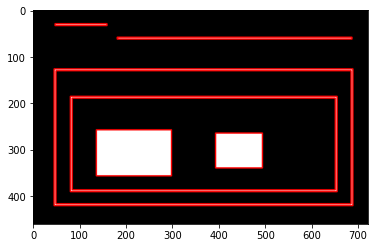

In [4]:
img1 = np.copy(img)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, 2)
print(hierarchy)
cv2.drawContours(img1, contours, -1, (0, 0, 255), 2)
plt.imshow(img1[:,:,::-1])
plt.show()

In [5]:
# 轮廓寻找方式
# RETR_LIST
# 不建立轮廓间的子属关系
# 不需要轮廓层级信息的话，cv2.RETR_LIST更推荐使用
_, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, 2)
print(hierarchy)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [-1  6 -1 -1]]]


In [6]:
# RETR_LIST 完整建立轮廓的层级从属关系

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]


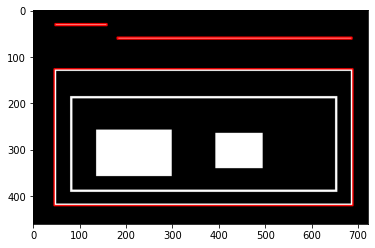

In [7]:
# RETR_EXTERNAL 只寻找最高层级的轮廓
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, 2)
print(hierarchy)
img1 = np.copy(img)
cv2.drawContours(img1, contours, -1, (0, 0, 255), 2)
plt.imshow(img1[:,:,::-1])
plt.show()

In [8]:
# RETR_CCOMP
# 把所有的轮廓只分为2个层级，不是外层的就是里层
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, 2)
print(hierarchy)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 4  1  3 -1]
  [-1 -1 -1  2]
  [ 6  2  5 -1]
  [-1 -1 -1  4]
  [ 7  4 -1 -1]
  [-1  6 -1 -1]]]


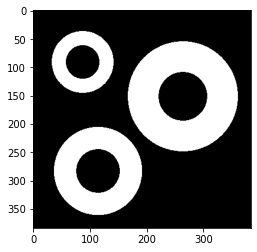

In [9]:
img = cv2.imread('circle_ring.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, 'gray')
plt.show()

In [10]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, 2)
print(hierarchy)

[[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [-1  2  5 -1]
  [-1 -1 -1  4]]]


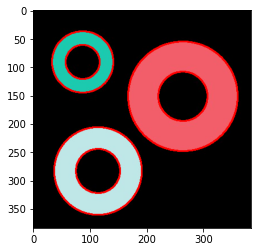

In [11]:
img1 = np.copy(img)
cv2.drawContours(img1, contours, -1, (0, 0, 255), 2)
plt.imshow(img1[:,:,::-1])
plt.show()

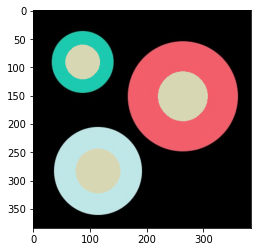

In [12]:
cs = []
for h in hierarchy[0]:
    if h[2] != -1:
         cs.append(contours[h[2]])
img1 = np.copy(img)
cv2.drawContours(img1, cs, -1, (180, 215, 215), -1)
plt.imshow(img1[:,:,::-1])
plt.show()